# Ford GoBike System Data Analysis
## by Mohamed Algohary

## Preliminary Wrangling

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area for the month of February 2019.

In [1]:
# Importing required packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

In [2]:
# Loading the data set
df = pd.read_csv("201902-fordgobike-tripdata.csv")

In [3]:
# Exploring the first few observations
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
# Checking the shape of the data
df.shape

(183412, 16)

In [5]:
# Checking the features' data types & other general information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [6]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


#### Wrangling notes
- [x] `start_time` and `end_time` column are of `object` type, they should be converted to `date_time`.
- [x] `member_birth_year` is of `float64` type and should be changed to `int64`.
- [x] There are `NaN` values in some of the columns.
- [x] There are some unnecessary features `columns` for the purpose of our analysis.
- [x] There are possible erroneous values in some columns such as:
    - [x] A minimum value in `duration_sec` of 61 seconds.
    - [x] A minimum value in `member_birth_year` of 1878.

### Structure of the data set

The data set contains 183,412 observations (rows) and 16 features (columns).

The order of the features can be categorized as follows: 
1. Time information including trip duration (*seconds*), trip start time, and trip end time.
2. Station (*start & end*) information including station ID, station latitude and longitude, and station name.
3. User and ride type information such as bike ID, trip type, user type, birth year, and gender.

### Main features of interest in the data set

I'm most interested in figuring out what features are best for predicting more trips.

### Supporting features in the data set

I believe that the time of day will have the strongest effect on the number of trips (bike rides), that is the closer the time of day to work hours, the more trips will be taken by users during weekdays, and that day hours will have more trips than night hours.

I can assume as well that most of the trips will come from young, male users.

-------------------------
### Cleaning Data

In [7]:
# Removing unnecessary features from the data set
df.drop(
    columns=[
        "start_station_id",
        "start_station_latitude",
        "start_station_longitude",
        "end_station_id",
        "end_station_latitude",
        "end_station_longitude",
        "bike_id",
        "bike_share_for_all_trip",
    ],
    inplace=True,
)

In [8]:
# Dropping rows with NaN values
df.dropna(inplace=True)

In [9]:
# Converting member birth year column to integer type
df.member_birth_year = df.member_birth_year.apply(np.int64)

In [10]:
# Converting start time & end time column to datetime format
df[["start_time", "end_time"]] = df[["start_time", "end_time"]].apply(pd.to_datetime)

In [11]:
# Checking the changes so far
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   duration_sec        174952 non-null  int64         
 1   start_time          174952 non-null  datetime64[ns]
 2   end_time            174952 non-null  datetime64[ns]
 3   start_station_name  174952 non-null  object        
 4   end_station_name    174952 non-null  object        
 5   user_type           174952 non-null  object        
 6   member_birth_year   174952 non-null  int64         
 7   member_gender       174952 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 12.0+ MB


In [12]:
# Exploring how many users are above 100 years of age
df.query("member_birth_year < 1949").shape[0]

575

There are 575 people above 70 years of age, it is probable that most of the observations with users above 70 years old are erroneous as not a lot of people older than 70 would be interested in having a subscribtion to a bike sharing system.

In [13]:
# Dropping observations with users more than a 100 years old
df.drop(df.query("member_birth_year < 1949").index, inplace=True)

In [14]:
# Exploring trip duration minimums
df.query("duration_sec < 300").shape[0]

37748

In [15]:
# Trying another minimum above the statistical minimum we got before
df.query("duration_sec < 120").shape[0]

2942

There is a fair amount of observations with trip duration less than 120 seconds (*1.5 minutes*), so no records will be deleted and I will treat them as returns (*users decided to take a trip, then cancelled*), or perhaps there are two stations that are incredibly close to each other and trips can take a short time between them on weekends. 

In [16]:
# Checking the shape after this phase of cleaning
df.shape

(174377, 8)

In [17]:
df.head()

,duration_sec,start_time,end_time,start_station_name,end_station_name,user_type,member_birth_year,member_gender
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,Customer,1984,Male
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,Powell St BART Station (Market St at 4th St),Customer,1972,Male
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,Grove St at Masonic Ave,Central Ave at Fell St,Subscriber,1989,Other
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,10th Ave at E 15th St,Subscriber,1974,Male
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,4th St at Mission Bay Blvd S,Broadway at Kearny,Subscriber,1959,Male


### Creating Features

In [18]:
# Creating a duration per minute column

df["duration_min"] = round(df["duration_sec"] / 60).apply(np.int64)

In [19]:
# deleting the duration per second column
del df["duration_sec"]

In [20]:
# Creating a start hour column
df["start_hour"] = df["start_time"].dt.hour

In [21]:
# Creating a day of the week column from start time
df["start_dow"] = df.start_time.dt.day_name()

In [22]:
# Creating member_age column. Since the data is from 2019, I will subtract the birth year from it

df["member_age"] = 2019 - df["member_birth_year"]

In [23]:
# Defining a function to return string based on age
def age_group(age):
    if age < 30:
        return "20s"
    elif age < 40:
        return "30s"
    elif age < 50:
        return "40s"
    elif age < 60:
        return "50s"
    else:
        return "60s"


# Creating an age group column
df["age_group"] = df["member_age"].apply(age_group)

In [24]:
# Deleting the member birth year column as it is now unnecessary
del df["member_birth_year"]

In [25]:
# Creating a function to return day type (weekday, weekend)
def day_type(day):
    if day in ["Saturday", "Sunday"]:
        return "Weekend"
    else:
        return "Weekday"


# Creating a column for the day type
df["day_type"] = df["start_dow"].apply(day_type)

In [26]:
# Checking values in duration per minute column
df.duration_min.describe()

count    174377.000000
mean         11.737528
std          27.405556
min           1.000000
25%           5.000000
50%           9.000000
75%          13.000000
max        1409.000000
Name: duration_min, dtype: float64

The `duration_min` statistics show that the mean is 9 minutes and 75% of the observations are 13 minutes or less.

I will start by finding out the number of observations above 120 minutes and adjust from there if need be.

In [27]:
print("120 minutes:", df.query("duration_min > 120").count()[0])
print("100 minutes:", df.query("duration_min > 100").count()[0])
print("90 minutes:", df.query("duration_min > 90").count()[0])
print("75 minutes:", df.query("duration_min > 75").count()[0])
print("60 minutes:", df.query("duration_min > 60").count()[0])
print("45 minutes:", df.query("duration_min > 45").count()[0])
print("Total observations:", df.shape[0])
print(
    "Proportion of observations greater than 60 minutes:",
    df.query("duration_min > 45").count()[0] / df.shape[0] * 100,
)

120 minutes: 531
100 minutes: 698
90 minutes: 800
75 minutes: 1002
60 minutes: 1361
45 minutes: 2238
Total observations: 174377
Proportion of observations greater than 60 minutes: 1.2834261399152411


As calculated above, the proportion of observations greater than 60 minutes is around 1.3% which is insignificant. Removing these outliers will not have a great impact on our finding while at the same time will imporve the quality of the data.

In [28]:
df.drop(df.query("duration_min > 60").index, inplace=True)

In [29]:
# Checking our changes
print(
    f"The data set now has {df.shape[0]} observations (rows) and {df.shape[1]} features (columns)."
)
print("-" * 40)
print(df.info())
print("-" * 40)
df.head()

The data set now has 173016 observations (rows) and 12 features (columns).
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 173016 entries, 4 to 183411
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   start_time          173016 non-null  datetime64[ns]
 1   end_time            173016 non-null  datetime64[ns]
 2   start_station_name  173016 non-null  object        
 3   end_station_name    173016 non-null  object        
 4   user_type           173016 non-null  object        
 5   member_gender       173016 non-null  object        
 6   duration_min        173016 non-null  int64         
 7   start_hour          173016 non-null  int64         
 8   start_dow           173016 non-null  object        
 9   member_age          173016 non-null  int64         
 10  age_group           173016 non-null  object        
 11  day_type            173016 

,start_time,end_time,start_station_name,end_station_name,user_type,member_gender,duration_min,start_hour,start_dow,member_age,age_group,day_type
4,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,10th Ave at E 15th St,Subscriber,Male,26,23,Thursday,45,40s,Weekday
5,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,4th St at Mission Bay Blvd S,Broadway at Kearny,Subscriber,Male,30,23,Thursday,60,60s,Weekday
6,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,Palm St at Willow St,San Jose Diridon Station,Subscriber,Female,19,23,Thursday,36,30s,Weekday
7,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,Washington St at Kearny St,Valencia St at 21st St,Subscriber,Male,27,23,Thursday,30,30s,Weekday
8,2019-02-28 23:41:48.790,2019-03-01 00:07:59.715,Washington St at Kearny St,Valencia St at 21st St,Subscriber,Other,26,23,Thursday,31,30s,Weekday


I noticed that `Int64Index: 173016 entries, 4 to 183411` from the `df.info()` above, as well as a missing indexes from `df.head()`.

Although it shouldn't be necessary, I will reset the index to finish off this phase as tidy as possible.

In [30]:
# Resetting DataFrame indexes and checking the data head again
df.reset_index(drop=True, inplace=True)
df.head()

,start_time,end_time,start_station_name,end_station_name,user_type,member_gender,duration_min,start_hour,start_dow,member_age,age_group,day_type
0,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,10th Ave at E 15th St,Subscriber,Male,26,23,Thursday,45,40s,Weekday
1,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,4th St at Mission Bay Blvd S,Broadway at Kearny,Subscriber,Male,30,23,Thursday,60,60s,Weekday
2,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,Palm St at Willow St,San Jose Diridon Station,Subscriber,Female,19,23,Thursday,36,30s,Weekday
3,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,Washington St at Kearny St,Valencia St at 21st St,Subscriber,Male,27,23,Thursday,30,30s,Weekday
4,2019-02-28 23:41:48.790,2019-03-01 00:07:59.715,Washington St at Kearny St,Valencia St at 21st St,Subscriber,Other,26,23,Thursday,31,30s,Weekday


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173016 entries, 0 to 173015
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   start_time          173016 non-null  datetime64[ns]
 1   end_time            173016 non-null  datetime64[ns]
 2   start_station_name  173016 non-null  object        
 3   end_station_name    173016 non-null  object        
 4   user_type           173016 non-null  object        
 5   member_gender       173016 non-null  object        
 6   duration_min        173016 non-null  int64         
 7   start_hour          173016 non-null  int64         
 8   start_dow           173016 non-null  object        
 9   member_age          173016 non-null  int64         
 10  age_group           173016 non-null  object        
 11  day_type            173016 non-null  object        
dtypes: datetime64[ns](2), int64(3), object(7)
memory usage: 15.8+ MB


## Univariate Exploration

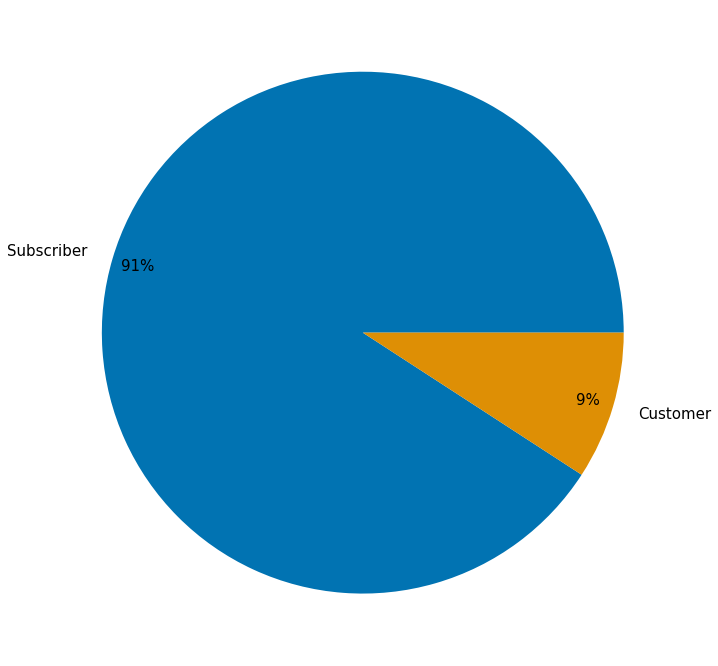

In [32]:
# Checking user type proportions
plt.rcParams["figure.figsize"] = (20, 12)
labels = df["user_type"].value_counts().index
colors = sns.color_palette("colorblind")[0:3]
plt.pie(
    df["user_type"].value_counts(),
    labels=labels,
    colors=colors,
    autopct="%1.0f%%",
    pctdistance=0.9,
    textprops={"size": 15},
);

It turn out that 91% of the users are subscribers while 9% are not.

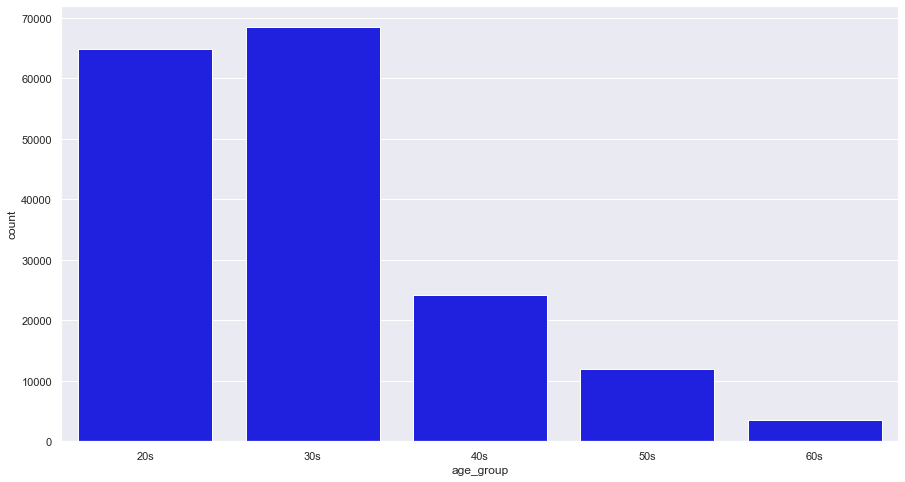

In [33]:
# Distribution of members by age group
sns.set(rc={"figure.figsize": (15, 8)})
sns.countplot(
    data=df,
    x="age_group",
    order=["20s", "30s", "40s", "50s", "60s"],
    color="blue",
);

Most of the trips were by younger users, which is to be expected. The 30s group tops the list, followed by the 20s group. Users who're beyond their 60s have a very low trip count, to the extent that the 80s and 90s group do not show in the plot.

I'll now take a look users' distribution by gender.

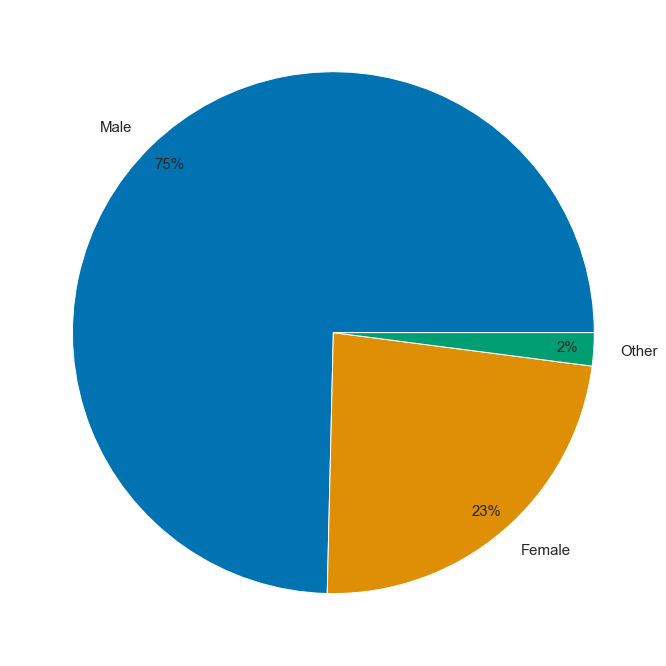

In [34]:
# Users' distribution by gender

plt.rcParams["figure.figsize"] = (20, 12)
labels = df["member_gender"].value_counts().index
colors = sns.color_palette("colorblind")[0:3]
plt.pie(
    df["member_gender"].value_counts(),
    labels=labels,
    colors=colors,
    autopct="%1.0f%%",
    pctdistance=0.9,
    textprops={"size": 15},
);

As expected, 75% of the users are males, 23% are females, and there are 2% for others. Nothing unusual.

Now, we can take a look at what hours of the day are more popular for bike rides

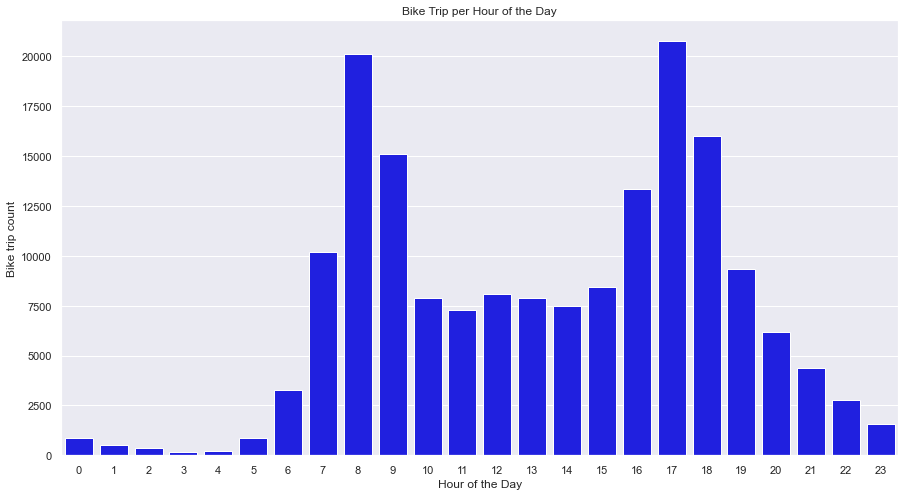

In [35]:
# Most popular hours for bike rides overall

sns.set(rc={"figure.figsize": (15, 8)})
sns.countplot(data=df, x="start_hour", color="blue")
plt.title("Bike Trip per Hour of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Bike trip count");

The most popular hours of day to take a trip are at 8 AM through 9 AM and at 5 PM through 6 PM, which is logical given that these times are typically around a work day.

Next, I'll try to explore if there is a difference in distribution between weekdays and weekends.

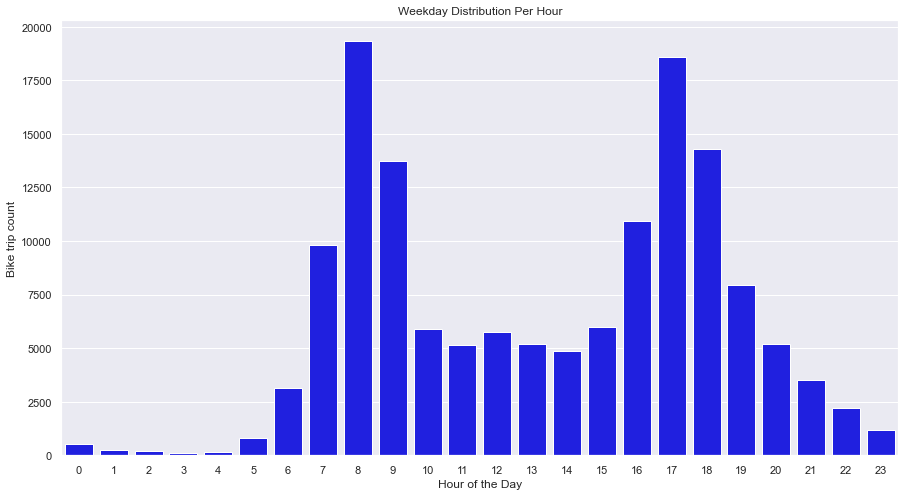

In [36]:
# Most popular hours during weekdays

sns.set(rc={"figure.figsize": (15, 8)})
sns.countplot(
    data=df,
    x=df.query("start_dow != 'Saturday' & start_dow != 'Sunday'")["start_hour"],
    color="blue",
)
plt.title("Weekday Distribution Per Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Bike trip count");

There is no noticeable change when excluding weekend days from our graph except for a drop in values between the two peaks, I will take a look at weekend days alone to investigate further.

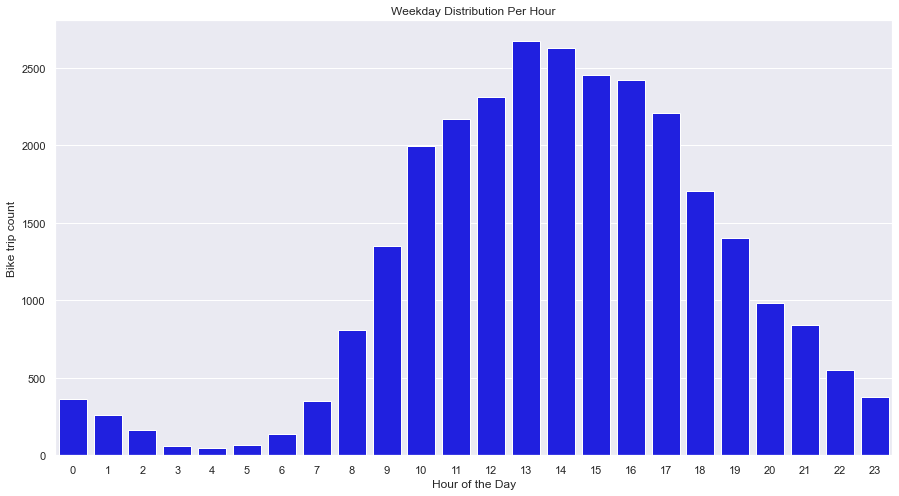

In [37]:
# Most popular hours during weekends

sns.set(rc={"figure.figsize": (15, 8)})
sns.countplot(
    data=df,
    x=df.query("start_dow == 'Saturday' or start_dow == 'Sunday'")["start_hour"],
    color="blue",
)
plt.title("Weekday Distribution Per Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Bike trip count");

While the graph was bimodal for weekdays and overall, it turned into being unimodal for the weekends showing peak hours to be from 10 AM to 5 PM. This is expected as well.

The first graph for all days was near identical to the second graph showing only weekdays while the third graph for weekends was very different. This might suggest that most of the bike trips are on weekdays, I will explore the distribution by day next to confirm that.

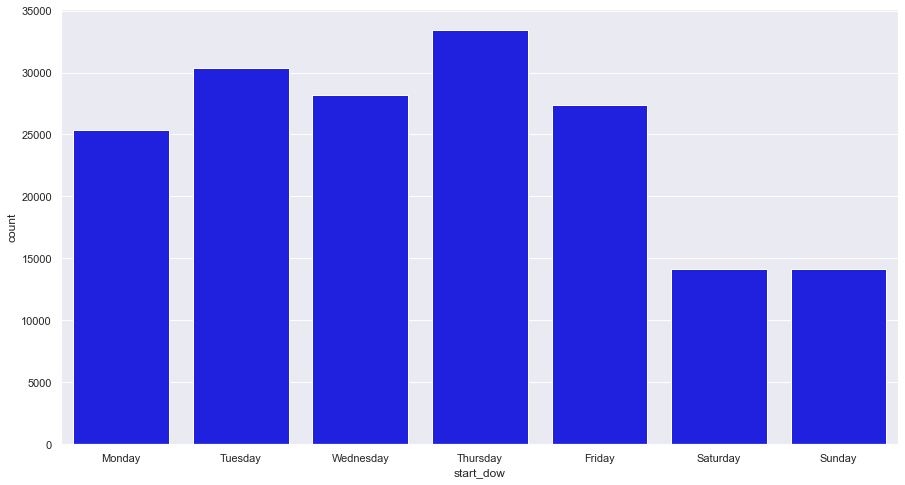

In [38]:
# Days with the most bike rides
sns.countplot(
    data=df,
    x="start_dow",
    order=[
        "Monday",
        "Tuesday",
        "Wednesday",
        "Thursday",
        "Friday",
        "Saturday",
        "Sunday",
    ],
    color="blue",
);

As expected, most of the rides were on weekdays, with the midweek having the most bike rides.

Next, I will explore the trip duration.

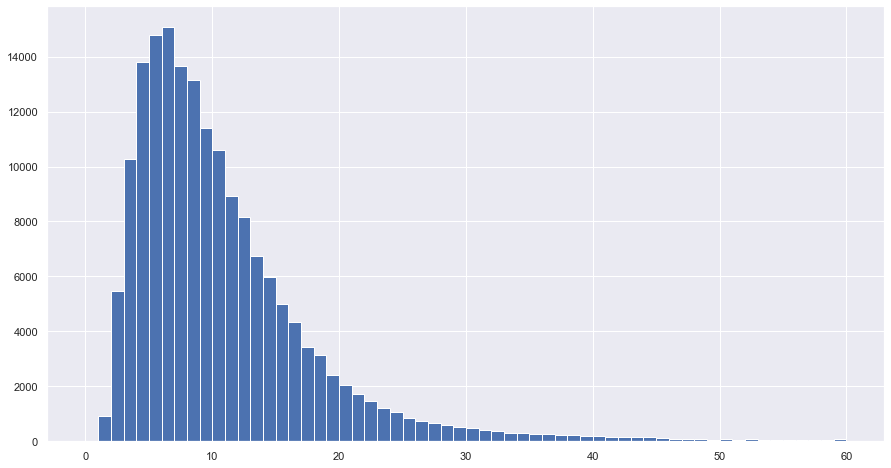

In [39]:
# Plotting the trip duration feature
bins = np.arange(0, df["duration_min"].max() + 1, 1)
plt.hist(data=df, x="duration_min", bins=bins);

Most of the trips took less than 20 minutes to complete, with few outliers taking up to 60 minutes.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The duration variable is right-skewed, this suggests that trips taking more than 20 minutes are not very common.
the `duration_min` column did not need any transformations to provide good insights.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

There were inaccurate values in members birth year, one user was 141 years old, while a couple of hundred users were above 100 years old. I removed these values, but felt I shouldn't remove any observations less than 100 years old, even if their probability of being accurate is low.

There were possibly inaccurate trip durations as well, I created the `duration_min` column then inspected the durations that were way off. The dropped observations were insignificant in size but once dropped, cleared the data for proper exploration.

## Bivariate Exploration

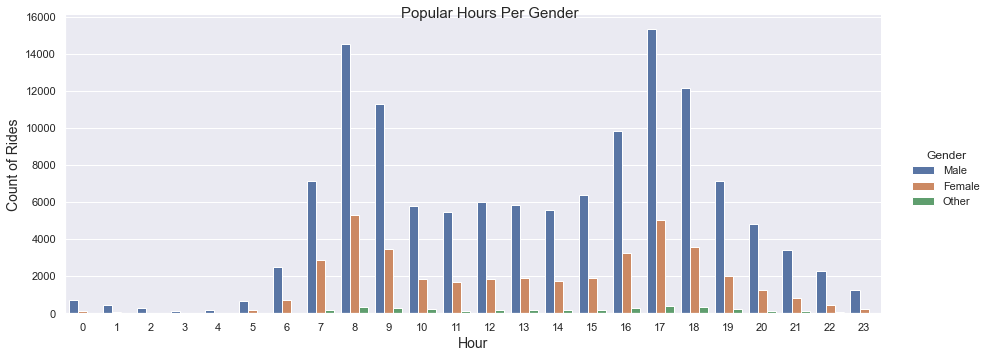

In [40]:
# Popular hours vs gender
sns.set_style("darkgrid")
hour_vs_gender = sns.catplot(
    data=df,
    x="start_hour",
    hue="member_gender",
    kind="count",
    palette="deep",
    aspect=2.5,
)

hour_vs_gender.set_axis_labels("Hour", "Count of Rides", fontsize=14)
hour_vs_gender._legend.set_title("Gender")
hour_vs_gender.fig.suptitle("Popular Hours Per Gender", fontsize=15);

The hour of day doesn't seem to have an effect on gender distribution for the bike rides. This graph above is consistent with the univariate hourly distribution of rides.

I will look at hours vs user type to see if there is anything interesting

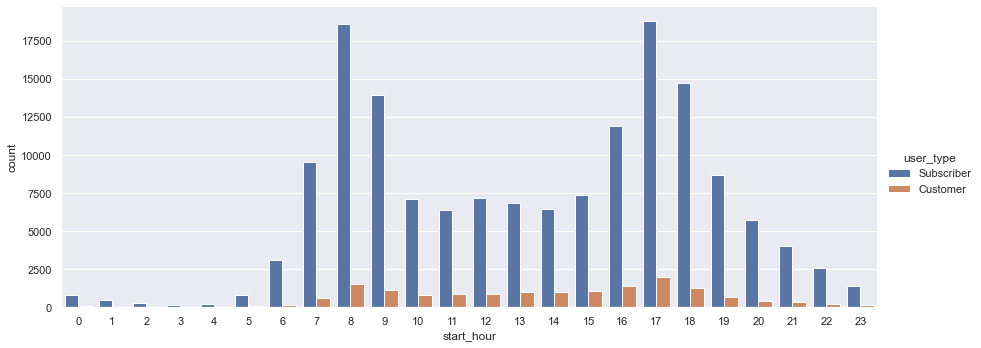

In [41]:
sns.set_style("darkgrid")
hour_vs_gender = sns.catplot(
    data=df, x="start_hour", hue="user_type", kind="count", palette="deep", aspect=2.5
)

Same bimodal graph with peaks around work start/end hours can be observed above, nothing out of the ordinary.

Next, I'm going to investigate whether there is any correlation between user type and day of the week

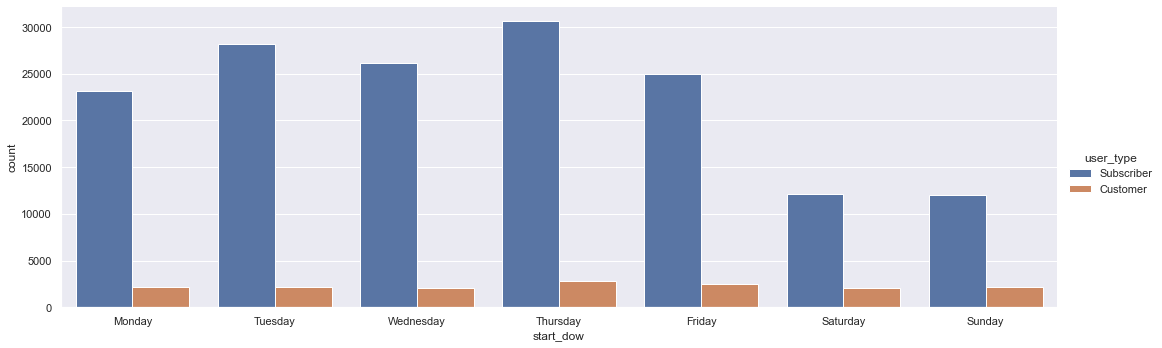

In [42]:
sns.set_style("darkgrid")
day_vs_type = sns.catplot(
    data=df,
    x="start_dow",
    hue="user_type",
    kind="count",
    palette="deep",
    aspect=3,
    order=[
        "Monday",
        "Tuesday",
        "Wednesday",
        "Thursday",
        "Friday",
        "Saturday",
        "Sunday",
    ],
)

The distribution of customer type users seems to be consistent over the days of the week unlike the subscribers.

Next, I will check the distribution of members' gender vs age group

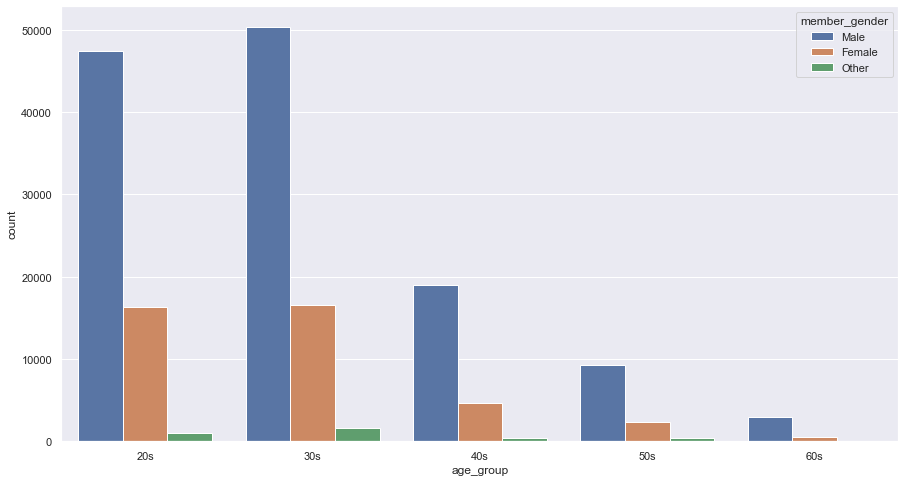

In [43]:
order = ["20s", "30s", "40s", "50s", "60s"]
sns.countplot(
    data=df,
    x="age_group",
    order=order,
    hue="member_gender",
    hue_order=["Male", "Female", "Other"],
);

The proportion of genders across all age groups looks consistent, so I believe there is no correlation here.

The next distribution to explore will be that of user age vs user type.

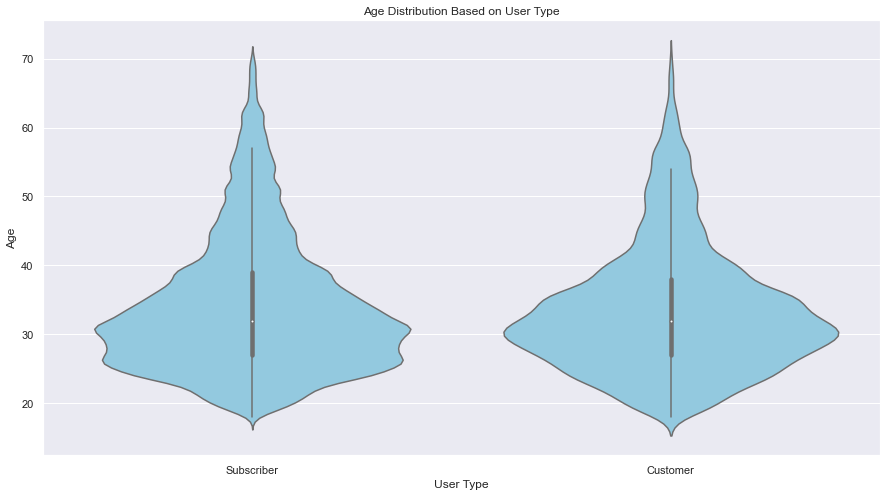

In [44]:
sns.violinplot(data=df, x="user_type", y="member_age", color="skyblue")

ax = plt.gca()
ax.set_ylabel("Age")
ax.set_xlabel("User Type")
ax.set_title("Age Distribution Based on User Type");

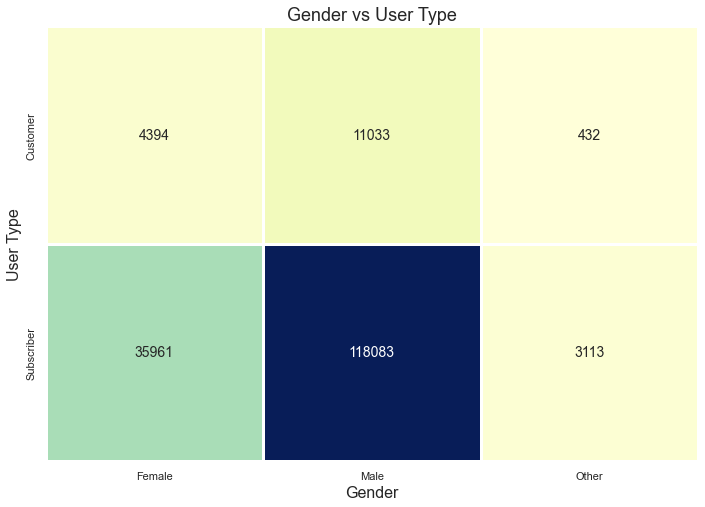

In [45]:
# Creating a DataFrame for gender vs type data
gender_vs_type = df.groupby("user_type")["member_gender"].value_counts().unstack()

# Plotting the heatmap
plt.title("Gender vs User Type", fontdict={"fontsize": 18})
sns.heatmap(
    gender_vs_type,
    cmap="YlGnBu",
    annot=True,
    fmt=".0f",
    annot_kws={"fontsize": 14},
    linewidth=3,
    square=True,
    cbar=False,
)
plt.xlabel("Gender", fontsize=16)
plt.ylabel("User Type", fontsize=16);

In [46]:
# Proportion of subscribers per gender
print("Male", 118546 / (118546 + 11479))
print("Female", 36112 / (36112 + 4621))
print("Other", 3171 / (3171 + 448))

Male 0.9117169775043261
Female 0.886553899786414
Other 0.8762088974854932


Evidently, male users are slightly more likely to be subscribers based on these findings.

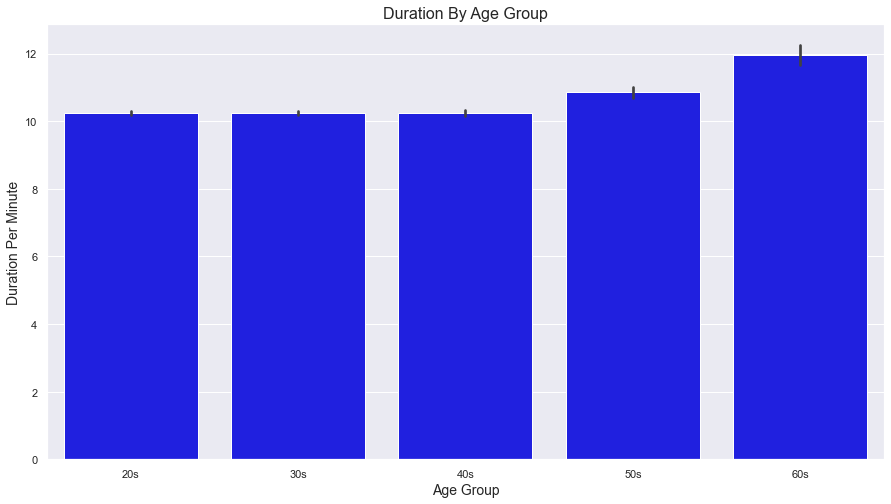

In [47]:
order = ["20s", "30s", "40s", "50s", "60s"]
plt.title("Duration By Age Group", fontsize=16)
sns.barplot(data=df, x="age_group", order=order, y="duration_min", color="blue")
plt.xlabel("Age Group", fontsize=14)
plt.ylabel("Duration Per Minute", fontsize=14);

Trip duration seem to increase very slightly with age. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Age distribution did not have an effect on whether a user was a subscriber or not. The proportion of each gender by age group was consistent as well.

Popular hours were, as expected, around work hours during weekdays, while shifting towards midday hours during weekends.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Trip duration was generally consistent among all the different age groups, that was contrary to my expectation that I would find significant variances while duration times go up as the age group goes up as well.

Another interesting finding is that subscribers' trip count tend to be less during the weekends which is logical. This is probably due to most subscribers using their subscriptions to go to work on weekdays then, understandably, would want to take a break from pedaling during the weekends. But when it comes to customers without subscription, their trip count is mostly consistent during all days of the week. This was contrary to my initial assumption that customer-type trips would increase over the course of the weekends as a leisure activity.

## Multivariate Exploration

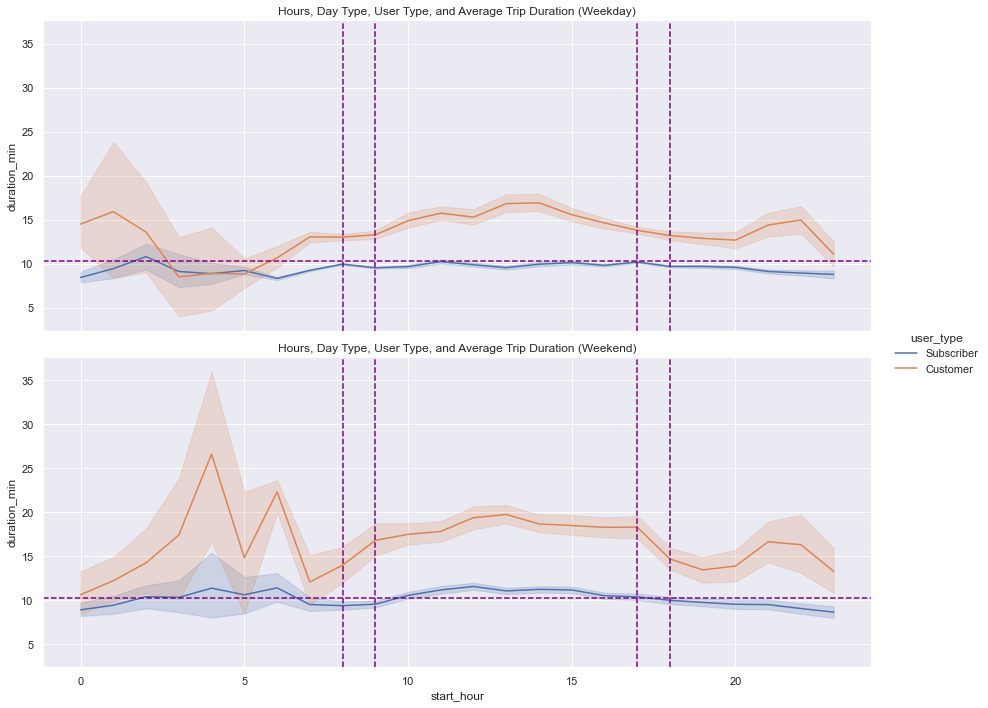

In [48]:
# Plotting hours, day type, user type, and average duration
g = sns.relplot(
    kind="line",
    data=df,
    x="start_hour",
    y="duration_min",
    estimator=np.mean,
    hue="user_type",
    row="day_type",
    height=5,
    aspect=2.5,
)

g.refline(y=df["duration_min"].mean(), color="purple")
for hour in [8, 9, 17, 18]:
    g.refline(x=hour, color="purple")

g.set_titles(
    row_template="Hours, Day Type, User Type, and Average Trip Duration ({row_name})"
);

It is noticeable that trip durations within the boundaries of work hours are more consistent than that of early morning or late evening. The consistency in duration is also noticeable more in subscribers, while customers durations vary greatly especially in early morning.

Overall, customers have higher average durations than subscribers.  

Next, I will look at trip durations for both user types by gender.

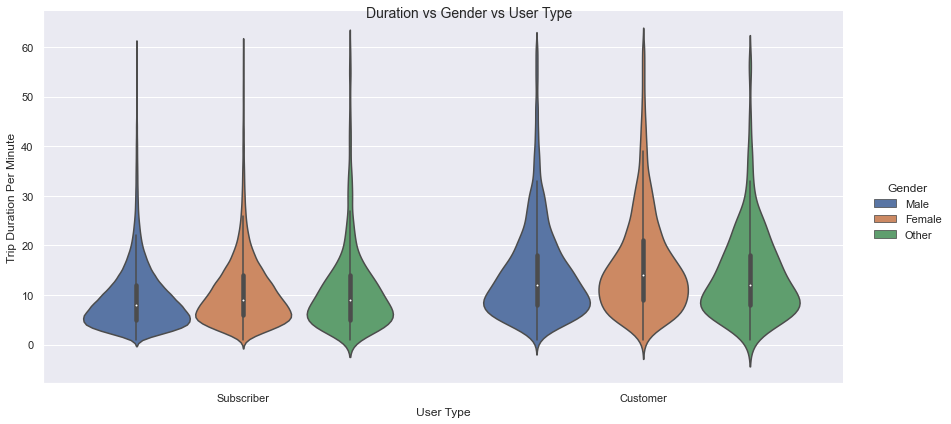

In [49]:
g = sns.catplot(
    data=df,
    x="user_type",
    y="duration_min",
    hue="member_gender",
    kind="violin",
    height=6,
    aspect=2,
)

g.set_axis_labels("User Type", "Trip Duration Per Minute")
g._legend.set_title("Gender")
g.fig.suptitle("Duration vs Gender vs User Type", fontsize=14);

Female durations are barely longer than males by looking at the graph. Interestingly, male durations of subscriber category are the least, although be it by a very small difference.

I will also look into duration vs gender vs age.

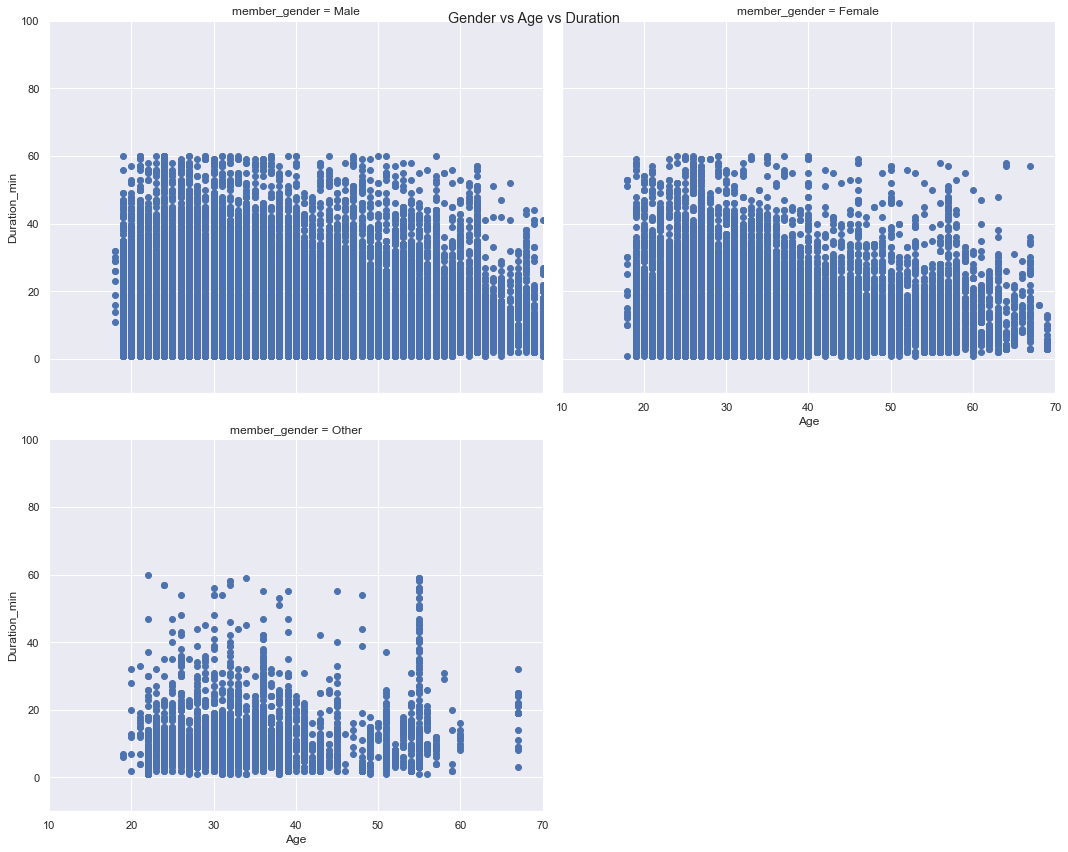

In [50]:
g = sns.FacetGrid(
    data=df,
    col="member_gender",
    height=6,
    xlim=[10, 70],
    ylim=[-10, 100],
    aspect=1.25,
    col_wrap=2,
)
g.map(plt.scatter, "member_age", "duration_min", alpha=1)


g.set_xlabels("Age")
g.set_ylabels("Duration_min")
g.fig.suptitle("Gender vs Age vs Duration")
plt.show()

Interestingly, contrary to our previous findings where there was a slight increase in duration for older users, here when broken down by gender we can observe a very slight decrease in durations in males and females for older users.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

When looking at the duration of rides for each user type while taking into account the hour of the day and whether it is a weekday or weekend, we observed that customers' rides are on average longer than subscribers'.

These findings were also strengthened on the next graph when we looked at users vs subscribers' trip durations per gender as it was obvious that the customers' times were longer on average.

### Were there any interesting or surprising interactions between features?

The same finding above surprised me somewhat when I observed how the ride duration averages for customers were higher than those of subscribers.

## Summary

Based on the available data, the following observations were found:

- 91% of the users are subscribers, while 9% are not.
- The gender distribution of the data is 75% males, 23% females, and 2% other.
- Younger users, mainly users in their 30s followed by those in their 20s, are the majority of the service users.
- The use of the service peaks mainly at 8 AM and 5 PM, namely rush hours. This is due to work times of most businesses in the United States.
- The busiest days of week in regards of service use is during midweeks from Tuesday to Thursday, while weekends witness the lowest use of service.
- The majority of service (bike rides) take 20 minutes or less.
- The age of the user does not seem to affect whether the user is a  subscriber or not.
- Male users have the highest proportion of subscribers.
- An average subscriber trip is about 10 minutes. The durations of subscribers seem to be fixed within that range (no major fluctuations)
- The variation for customers tends to be more that that of subscribers
- Trips during the weekends seem to take slightly longer than trips on weekdays

-----------------------------
### Disclaimer

This notebook was formatted with the [black formatter](https://github.com/psf/black) package to ensure full conformace with the latest [PEP](https://www.python.org/dev/peps/pep-0664/) guidelines.


### Resouces

- [Kimberly Fessel - YouTube](https://www.youtube.com/channel/UCirb0k3PnuQnRjh8tTJHJuA)
- [Matplotlib Official Cheat Sheets](https://matplotlib.org/cheatsheets/)
- [Seaborn Official Documentation](https://seaborn.pydata.org/index.html)
- [How to include labels in sns heatmap](https://datascience.stackexchange.com/questions/31746/how-to-include-labels-in-sns-heatmap)
- [Change Order on X-Axis for Matplotlib chart](https://stackoverflow.com/questions/47255746/change-order-on-x-axis-for-matplotlib-chart)
- [Pandas 1.x Cookbook](https://www.amazon.com/Pandas-1-x-Cookbook-scientific-exploratory-ebook/dp/B0851DDM7D)
- [Corey Schafer - YouTube](https://www.youtube.com/c/Coreyms)